# Constant Current

This notebook will teach you how to run a constant current experiment with the P2D simulation class. We start by importing the ``bmlite`` package and instantiating an instance of the ``P2D.Simulation`` class, as shown below. Note that by not passing a ``.yaml`` file as an input, we get a warning that the instance is built from the default file.

In [1]:
import bmlite as bm

sim = bm.P2D.Simulation()


[BatMods WARNING] P2D Simulation: Using a default yaml



After the simulation has finished initializing, you are ready to run any of the available experiments. All of the experiments are accessed from "run" methods. For example, to run a constant current eperiment, we will call ``sim.run_CC()``. All of the run methods take an experimental details dictionary (``exp``) as their input. The details are specific to the experiment being performed. To access a list of the required keys for ``exp`` you can run the ``help()`` command on the method, as shown below. An optional ``kwargs`` argument is also available, which can be used to set a variety of solver options.

In [2]:
help(sim.run_CC)

Help on method run_CC in module bmlite.P2D:

run_CC(exp: dict, **kwargs) -> object method of bmlite.P2D.Simulation instance
    Runs a constant current experiment specified by the details given in
    the experiment dictionary ``exp``.
    
    Parameters
    ----------
    exp : dict
        The constant current experimental details. Required keys and
        descriptions are listed below:
    
        =========== ==============================================
        Key         Value [units] (type)
        =========== ==============================================
        C_rate      C-rate (+ charge, - discharge) [1/h] (*float*)
        t_min       minimum time [s] (*float*)
        t_max       maximum time [s] (*float*)
        Nt          number of time discretizations [-] (*int*)
        =========== ==============================================
    
    **kwargs : dict, optional
        The keyword arguments specify the Sundials IDA solver options. A
        partial list of opt

Refering to the ``help()`` output above, we construct an ``exp`` dictionary below for a 2C discharge experiment. We will run the experiment from a starting time of ``t = 0`` seconds and stop at ``t = 1350`` seconds, saving the state variables in the solution for ``Nt = 150`` equally spaced time steps between ``0`` and ``1350`` seconds. The ``run_CC()`` outputs a solution class (named ``sol`` below). 

Note that we could also call ``bm.P2D.templates(exp='constant_current')`` to get a template for ``exp``. This may be faster and/or more convenient for some users. For more information, please review the tutorial on Making Inputs.

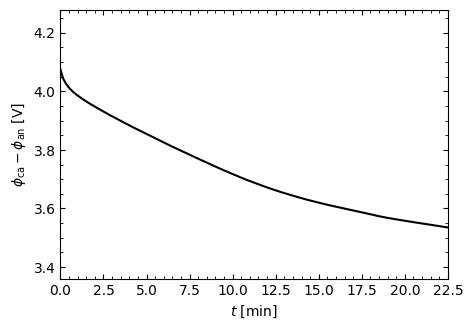

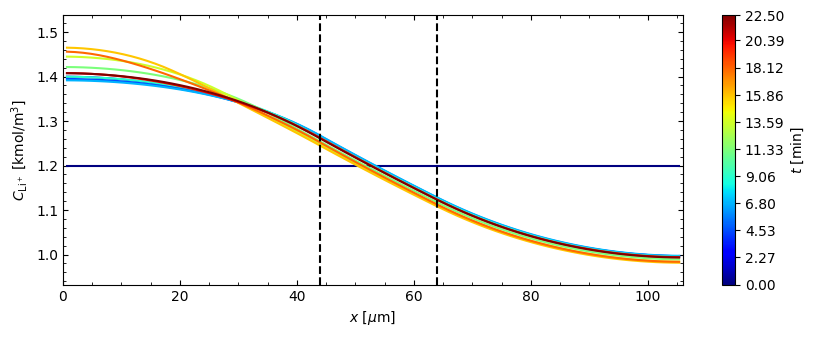

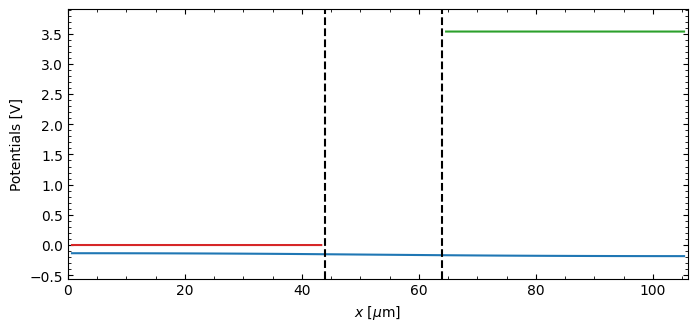

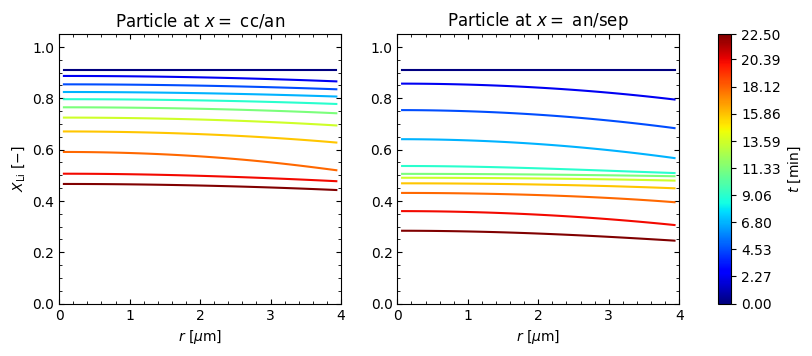

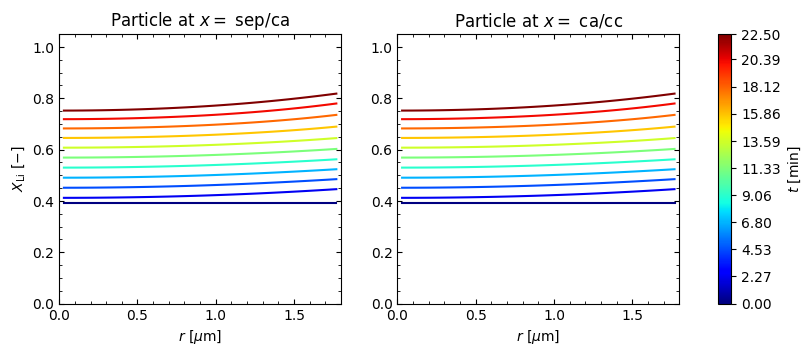

In [3]:
exp = {'C_rate': -2,
       't_min': 0., 
       't_max': 1350.,
       'Nt': 150
      }

sol = sim.run_CC(exp)

sol.plot('general')


```python
sol.slice_and_save('2C_discharge')
```